<a href="https://colab.research.google.com/github/hoobird/PythonForDataScience/blob/main/cartopy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q condacolab
import condacolab
condacolab.install()

!mamba install -q -c conda-forge cartopy


⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.1.0-1/Mambaforge-23.1.0-1-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:13
🔁 Restarting kernel...
Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done


In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

/usr/local/lib/python3.10/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


/usr/local/lib/python3.10/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


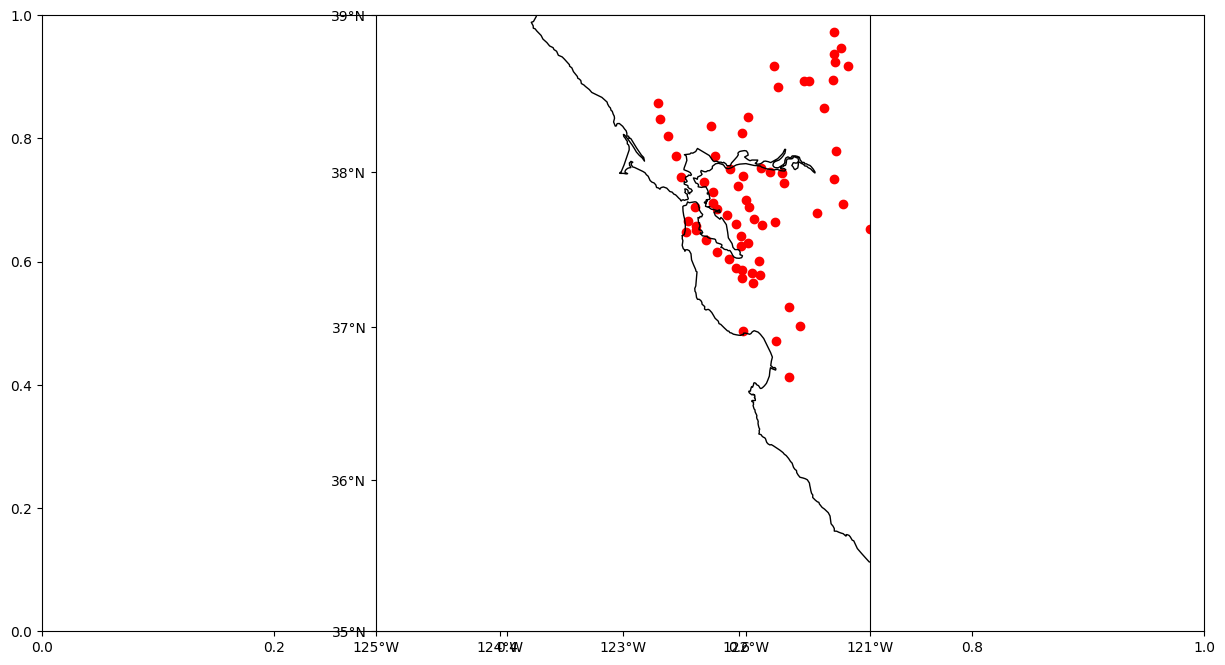

In [2]:
us_cities = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/us-cities-top-1k.csv")
calif_cities = us_cities[us_cities.State.eq('California')]
fig, ax = plt.subplots(figsize=(15,8))
ax = plt.axes(projection=ccrs.Mercator())
ax.coastlines('10m')
ax.set_yticks([35,36,37,38,39], crs=ccrs.PlateCarree())
ax.set_xticks([-125, -124, -123, -122, -121, -120, -119], crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_extent([-125, -121, 35, 39])
ax.set_extent([-125, -121, 35, 39], crs=ccrs.PlateCarree())
X = calif_cities['lon']
Y = calif_cities['lat']
ax.scatter(X, Y, color='red', marker='o', transform=ccrs.PlateCarree())
plt.show()

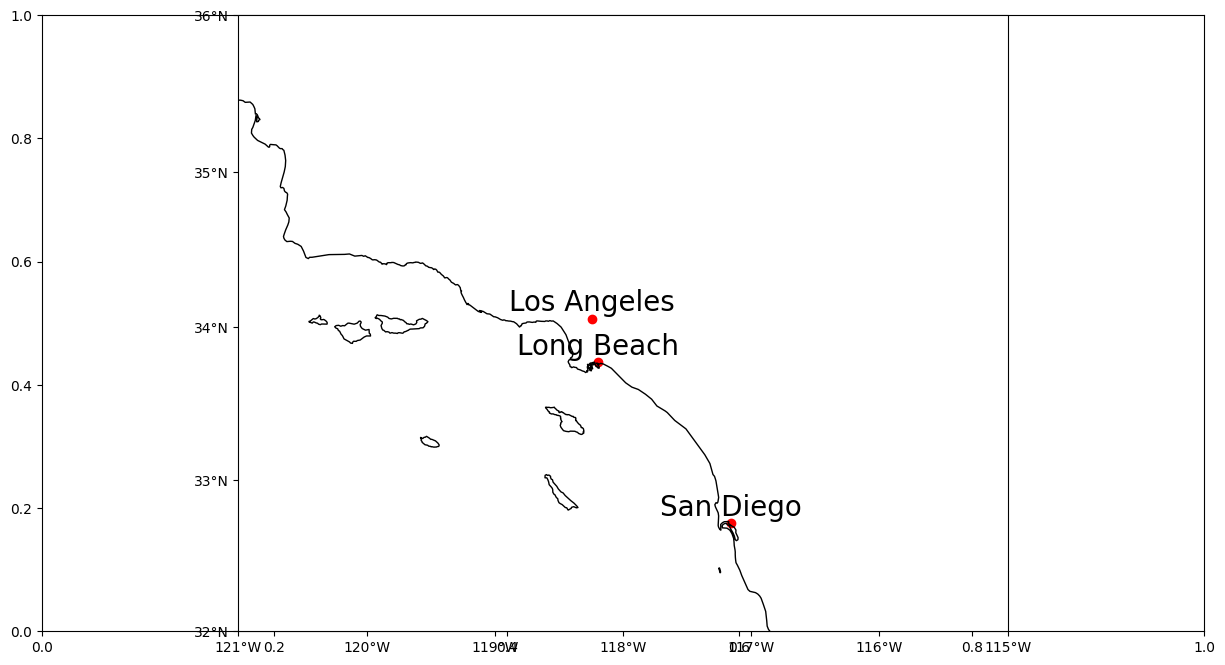

In [3]:
top_calif_cities = calif_cities[calif_cities.Population.ge(400000)]
fig, ax = plt.subplots(figsize=(15,8))
ax = plt.axes(projection=ccrs.Mercator())
ax.coastlines('10m')
ax.set_yticks([32,33,34,35,36], crs=ccrs.PlateCarree())
ax.set_xticks([-121, -120, -119, -118, -117, -116, -115], crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_extent([-121, -115, 32, 36])
X = top_calif_cities['lon']
Y = top_calif_cities['lat']
cities = top_calif_cities['City']
ax.scatter(X, Y, color='red', marker='o', transform=ccrs.PlateCarree())
for i in X.index:
  label = cities[i]
  plt.text(X[i], Y[i]+0.05, label, clip_on = True, fontsize = 20, horizontalalignment='center', transform=ccrs.Geodetic())
plt.show()